# 🎭 Wicked on Broadway: A Data-Driven Performance Analysis

This notebook explores the performance of the Broadway musical *Wicked* through a combination of financial, attendance, and social network data. Drawing from public records and historical season data, we examine:

- 💰 **Weekly gross profits** over the 2024–2025 season
- 🎟️ **Attendance rates**, including capacity percentages and fluctuations
- 🦠 Comparative trends across **pre-COVID**, **COVID**, and **post-COVID** seasons

Key questions to explore:
- Did the release of the *Wicked* movie in November 2024 impact Broadway performance metrics?
- How do current attendance and revenue figures compare to previous seasons along with influences from the pandemic?
- Are there price fluctuations that correlate with holidays?

*Data sources include The Broadway League and archival playbill information.*

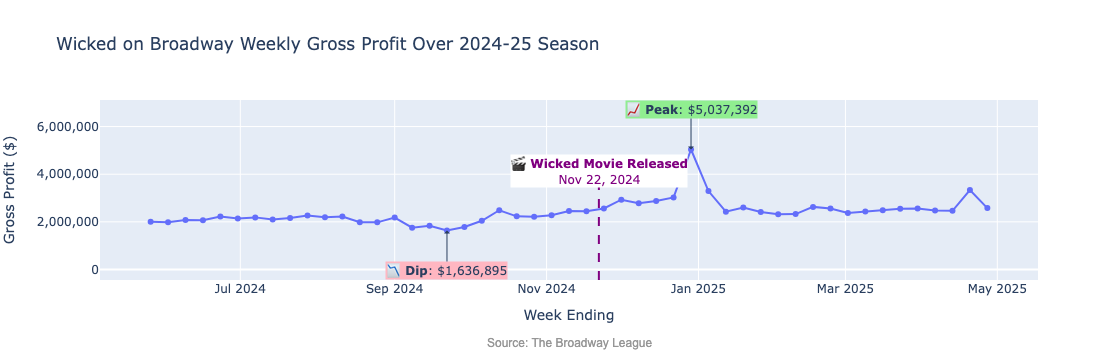

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv('Datasets/Wicked Grosses 2024-25 - Sheet1.csv')

df['Season Week End Date'] = pd.to_datetime(df['Season Week End Date'])

peak_row = df[df['Gross Profit'] == df['Gross Profit'].max()].iloc[0]
dip_row = df[df['Gross Profit'] == df['Gross Profit'].min()].iloc[0]

fig = px.line(
    df,
    x='Season Week End Date',
    y='Gross Profit',
    title='Wicked on Broadway Weekly Gross Profit Over 2024-25 Season',
    labels={
        'Season Week End Date': 'Week Ending',
        'Gross Profit': 'Gross Profit ($)'
    },
    markers=True
)

fig.add_annotation(
    x=peak_row['Season Week End Date'],
    y=peak_row['Gross Profit'],
    text="📈 <b>Peak</b>: ${:,}".format(peak_row['Gross Profit']),
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40,
    bgcolor="lightgreen"
)

fig.add_annotation(
    x=dip_row['Season Week End Date'],
    y=dip_row['Gross Profit'],
    text="📉 <b>Dip</b>: ${:,}".format(dip_row['Gross Profit']),
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=40,
    bgcolor="lightpink"
)

wicked_date = pd.to_datetime("2024-11-22")

if wicked_date > df['Season Week End Date'].max():
    x_end = wicked_date + pd.Timedelta(days=7)
    x_start = df['Season Week End Date'].min()
    fig.update_layout(xaxis_range=[x_start, x_end])

fig.add_shape(
    type='line',
    x0=wicked_date, x1=wicked_date,
    y0=0, y1=0.7,  # Use plot height
    xref='x', yref='paper',
    line=dict(color="purple", width=2, dash="dash")
)

fig.add_annotation(
    x=wicked_date,
    y=0.7,
    xref='x',
    yref='paper',
    showarrow=False,
    text="🎬 <b>Wicked Movie Released</b><br>Nov 22, 2024",
    font=dict(color="purple"),
    bgcolor="white"
)

fig.add_annotation(
    xref='paper', yref='paper',
    x=0.5, y=-0.3,
    xanchor='center', yanchor='top',
    text='Source: The Broadway League',
    font=dict(family='Arial', size=12, color='rgb(150,150,150)'),
    showarrow=False
)

fig.update_traces(mode='lines+markers', hovertemplate='Week %{text}<br>Date: %{x|%b %d, %Y}<br>Gross: $%{y:,}')
fig.update_traces(text=df['Season Week'])

fig.update_layout(yaxis_tickformat=',')

fig.show()


### 📊 Key Findings from Gross Profit Analysis

The chart above displays weekly gross profits for *Wicked* on Broadway during the 2024–2025 season. A few important patterns emerge:

- 📉 **Lowest point (Dip):** The week ending in **September 2024** had the lowest gross profit at **$1,636,895**, potentially reflecting seasonal slowdowns.

- 🎬 **Wicked Movie Release:** On **November 22, 2024**, the *Wicked* film adaptation was released. The chart shows a **notable increase** in gross profit in the following weeks.
- 📈 **Peak performance:** The show reached its highest gross profit the week ending in **late December 2024**, totaling **$5,037,392** — more than **double** the earlier seasonal average.

These trends suggest a potential **boost in interest and attendance** tied to the film release, amplified by typical year-end Broadway demand.

> 📌 *Further analysis will investigate whether this spike was sustained, how attendance rates evolved over the same period, and how this compares to trends during the COVID-19 shutdown and prior years.*

🎬 Wicked Movie Release Impact on Gross Profit
T-statistic: 4.96
P-value: 0.00003
Average Gross (Before): $2,113,188
Average Gross (After):  $2,740,759


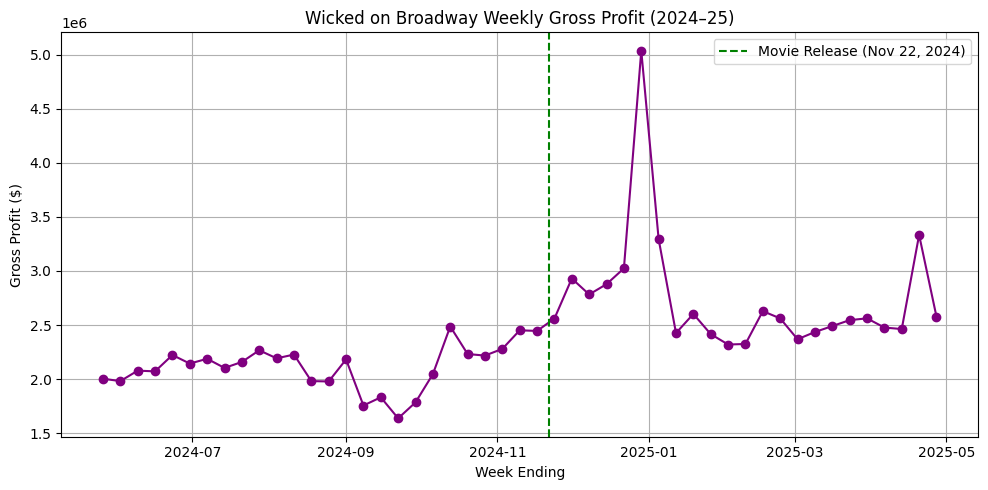

In [128]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

df = pd.read_csv("Datasets/Wicked Grosses 2024-25 - Sheet1.csv")

df["Season Week End Date"] = pd.to_datetime(df["Season Week End Date"])

release_date = pd.to_datetime("2024-11-22")

pre_movie = df[df["Season Week End Date"] < release_date]["Gross Profit"]
post_movie = df[df["Season Week End Date"] >= release_date]["Gross Profit"]

t_stat, p_value = ttest_ind(post_movie, pre_movie, equal_var=False)

print("🎬 Wicked Movie Release Impact on Gross Profit")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Average Gross (Before): ${pre_movie.mean():,.0f}")
print(f"Average Gross (After):  ${post_movie.mean():,.0f}")

plt.figure(figsize=(10, 5))
plt.plot(df["Season Week End Date"], df["Gross Profit"], marker='o', color='purple')
plt.axvline(release_date, color='green', linestyle='--', label='Movie Release (Nov 22, 2024)')
plt.title("Wicked on Broadway Weekly Gross Profit (2024–25)")
plt.xlabel("Week Ending")
plt.ylabel("Gross Profit ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 Interpretation: Impact of *Wicked* Movie on Broadway Revenue

Above is a two-sample t-test comparing average weekly gross profits **before** and **after** the movie release on **November 22, 2024**.

- **Average Gross Before**: ~$2.11M  
- **Average Gross After**: ~$2.74M  
- **T-statistic**: 4.96  
- **P-value**: 0.00003 (significant at p < 0.05)

📌 **Conclusion**: The release of the *Wicked* movie had a **statistically significant positive effect** on Broadway gross profits, suggesting increased interest or attendance in the weeks following the film's debut.


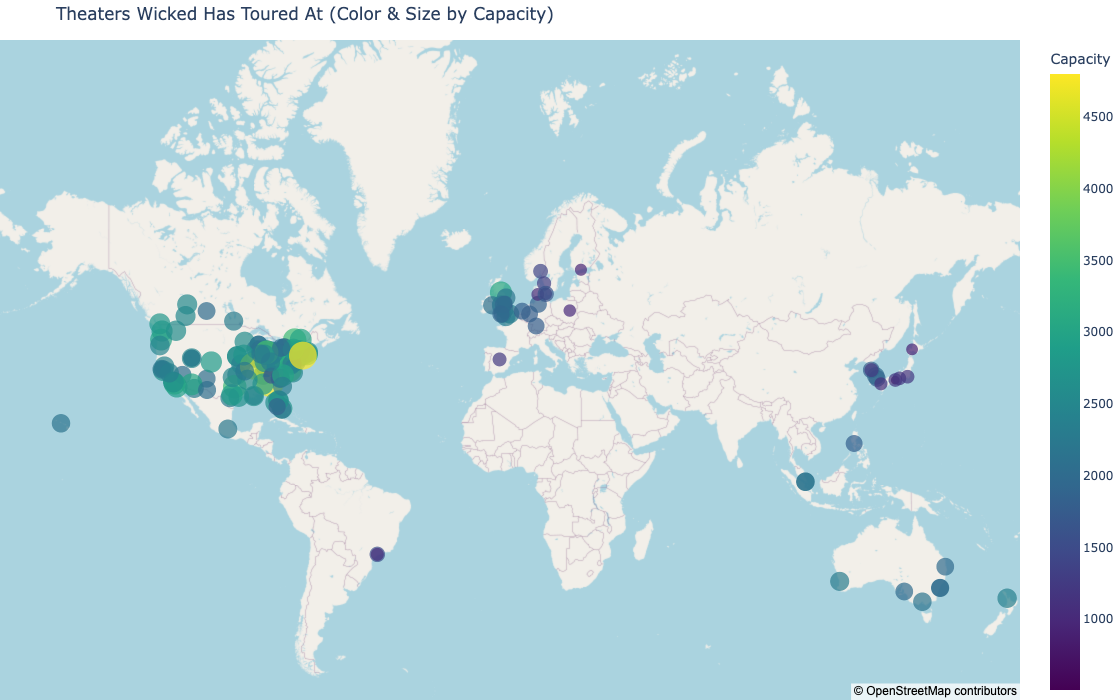

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv("Datasets/Wicked Theaters - Sheet1.csv")
df["Capacity"] = df["Capacity"].replace(",", "", regex=True).astype(int)

fig = px.scatter_mapbox(
    df,
    lat="Lat",
    lon="Long",
    hover_name="Theater Name",
    hover_data=["City", "Country", "Capacity"],
    size="Capacity",
    color="Capacity",
    size_max=20,
    color_continuous_scale="Viridis",
    zoom=1,
    height=700
)

fig.update_layout(
    mapbox_style="open-street-map",
    title="Theaters Wicked Has Toured At (Color & Size by Capacity)",
    margin={"r":0,"t":40,"l":0,"b":0},
    mapbox_center={"lat": 20, "lon": 0},  # Centered on Atlantic
    mapbox_bounds={"west": -180, "east": 180, "south": -60, "north": 85}
)

fig.show()

# 🌍 *Wicked* Global Theater Map Overview

This interactive map displays the global reach of the Broadway musical **_Wicked_**, showcasing **all known theaters where the production has been staged** since its 2003 premiere. The data includes venues across **North America, Europe, Asia, Oceania, and South America**, reflecting the musical’s widespread international appeal and touring history.

---

### 🗺️ Map Features

- 🟢 **Each circle** represents a theater that has hosted a *Wicked* performance.
- 🔵 **Circle size and color intensity** correspond to the theater’s **seating capacity**.
- 📍 **Hover over a point** to view the theater name, city, country, and capacity.

---

### ✨ Key Insights

- The **United States** hosts the highest density of venues, including:
  - The original production at the **Gershwin Theatre (NYC)**.
  - Dozens of stops from **U.S. national tours**, including the **Emerald City Tour** and the ongoing **Munchkinland Tour**.
  
- Other countries with multiple host cities include:
  - **Australia** – Sydney, Melbourne, Brisbane, Perth, Adelaide.
  - **South Korea** – Seoul, Busan, Daegu.
  - **Japan** – Tokyo, Osaka, Sapporo, Nagoya, Fukuoka.
  - **Germany** – Hamburg, Stuttgart, Oberhausen.
  - **United Kingdom** – London, Manchester, Edinburgh.

- The musical has also been performed in:
  - **Singapore**
  - **Brazil**
  - **Philippines**
  - **Finland**
  - **Denmark**
  - **New Zealand**
  - **Norway**
  - **Mexico**

---

This visualization emphasizes not only the **enduring popularity** of *Wicked* but also its **global theatrical footprint**—spanning continents and reaching millions of theatergoers around the world.

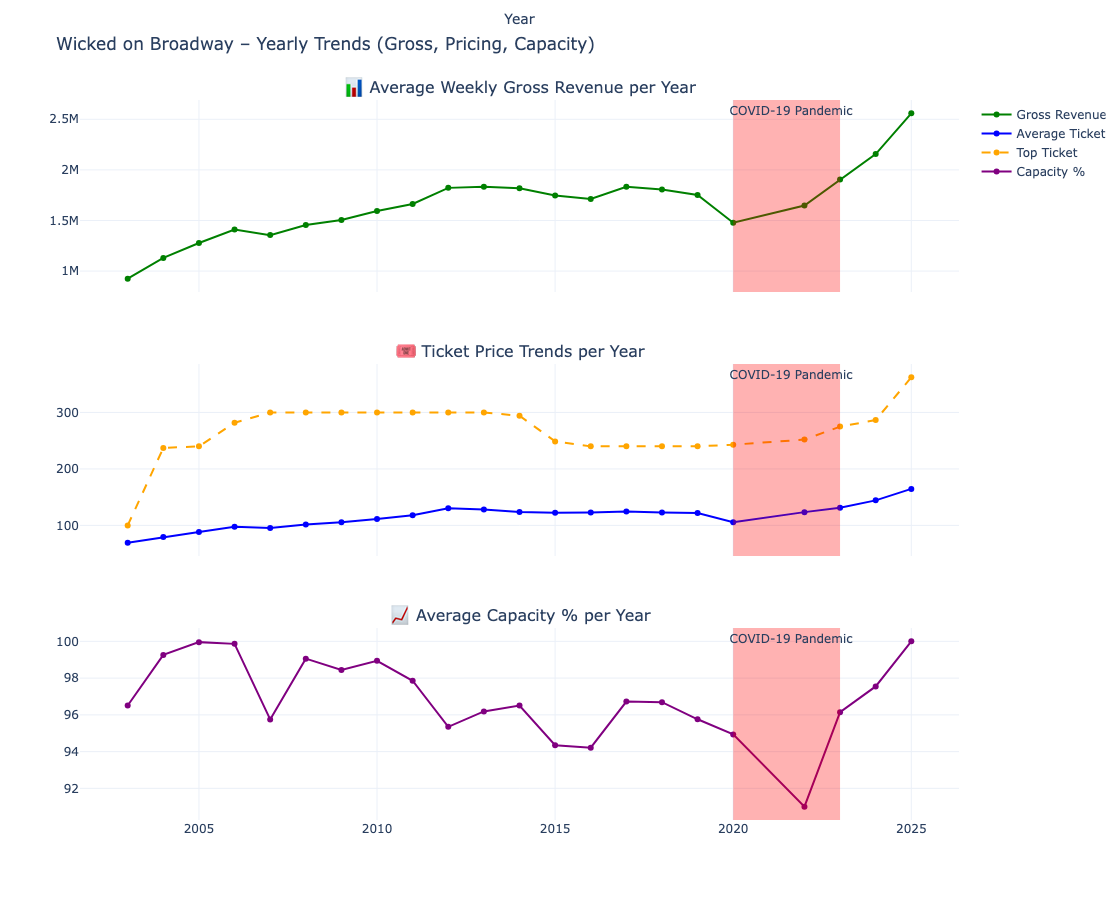

In [130]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv("Datasets/Cleaned_Wicked_Historical_Data.csv")

yearly_summary = df.groupby("Year").agg({
    "This Week Gross": "mean",
    "Avg Ticket": "mean",
    "Top Ticket": "mean",
    "% Cap This Week": "mean"
}).dropna().reset_index()

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=[
                        "📊 Average Weekly Gross Revenue per Year",
                        "🎟️ Ticket Price Trends per Year",
                        "📈 Average Capacity % per Year"
                    ])

fig.add_trace(go.Scatter(
    x=yearly_summary["Year"],
    y=yearly_summary["This Week Gross"],
    mode='lines+markers',
    name="Gross Revenue",
    line=dict(color="green")
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=yearly_summary["Year"],
    y=yearly_summary["Avg Ticket"],
    mode='lines+markers',
    name="Average Ticket",
    line=dict(color="blue")
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=yearly_summary["Year"],
    y=yearly_summary["Top Ticket"],
    mode='lines+markers',
    name="Top Ticket",
    line=dict(color="orange", dash="dash")
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=yearly_summary["Year"],
    y=yearly_summary["% Cap This Week"],
    mode='lines+markers',
    name="Capacity %",
    line=dict(color="purple")
), row=3, col=1)

fig.add_vrect(
    x0="2020", x1="2023",
    annotation_text="COVID-19 Pandemic", annotation_position="top left",
    fillcolor="red", opacity=0.3, line_width=0
)

fig.update_layout(
    height=900,
    title="Wicked on Broadway – Yearly Trends (Gross, Pricing, Capacity)",
    xaxis_title="Year",
    template="plotly_white",
    showlegend=True
)

fig.show()

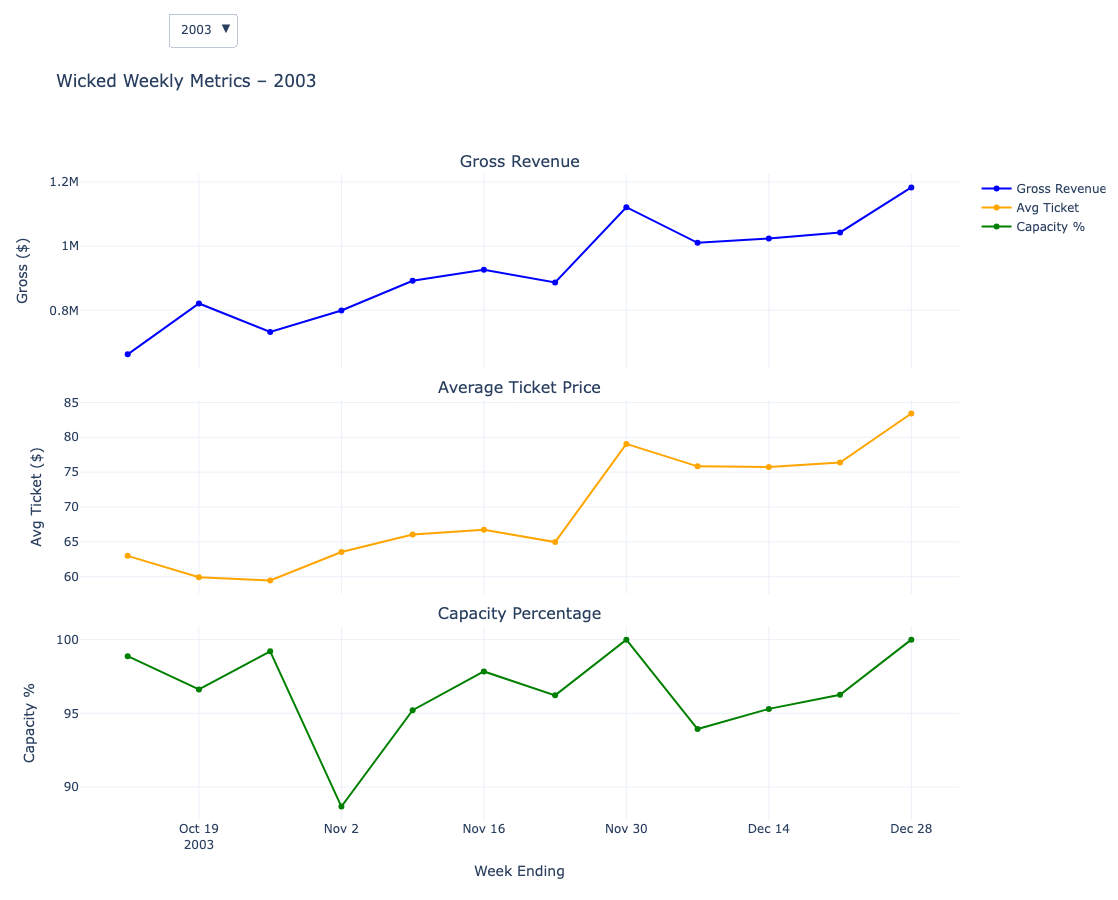

In [131]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv("Datasets/Cleaned_Wicked_Historical_Data.csv")
df = df.dropna(subset=["Week Ending", "This Week Gross", "Avg Ticket", "% Cap This Week"])
df["Week Ending"] = pd.to_datetime(df["Week Ending"])
df["Year"] = df["Week Ending"].dt.year
years = sorted(df["Year"].unique())

pandemic_declared = pd.to_datetime("2020-03-11")
broadway_shutdown = pd.to_datetime("2020-03-08")
broadway_reopen = pd.to_datetime("2021-09-19")
covid_end = pd.to_datetime("2023-05-05")

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=["Gross Revenue", "Average Ticket Price", "Capacity Percentage"])

init_year = years[0]
df_init = df[df["Year"] == init_year]

fig.add_trace(go.Scatter(x=df_init["Week Ending"], y=df_init["This Week Gross"],
                         mode="lines+markers", name="Gross Revenue", line=dict(color="blue")), row=1, col=1)
fig.add_trace(go.Scatter(x=df_init["Week Ending"], y=df_init["Avg Ticket"],
                         mode="lines+markers", name="Avg Ticket", line=dict(color="orange")), row=2, col=1)
fig.add_trace(go.Scatter(x=df_init["Week Ending"], y=df_init["% Cap This Week"],
                         mode="lines+markers", name="Capacity %", line=dict(color="green")), row=3, col=1)

buttons = []
for year in years:
    df_y = df[df["Year"] == year]
    year_start = df_y["Week Ending"].min()
    year_end = df_y["Week Ending"].max()

    shapes = []
    annotations = []

    x0 = max(pandemic_declared, year_start)
    x1 = min(covid_end, year_end)
    if x0 < x1:
        shapes.append(dict(
            type="rect", xref="x", yref="paper",
            x0=x0, x1=x1, y0=0, y1=1,
            fillcolor="red", opacity=0.15, line_width=0
        ))

    for date, label in [
        (pandemic_declared, "🛑 Pandemic Declared (WHO)"),
        (broadway_shutdown, "🎭 Wicked Shutdown"),
        (broadway_reopen, "🎟️ Wicked Reopens"),
        (covid_end, "🦠 WHO Declares End of Pandemic")
    ]:
        if year_start <= date <= year_end:
            shapes.append(dict(
                type="line", xref="x", yref="paper",
                x0=date, x1=date, y0=0, y1=1,
                line=dict(color="red", width=2, dash="dot")
            ))
            annotations.append(dict(
                x=date, y=1.05, xref="x", yref="paper",
                text=label, showarrow=False, font=dict(color="red", size=11)
            ))

    buttons.append(dict(
        label=str(year),
        method="update",
        args=[
            {"x": [df_y["Week Ending"]]*3,
             "y": [df_y["This Week Gross"], df_y["Avg Ticket"], df_y["% Cap This Week"]]},
            {"title": f"Wicked Weekly Metrics – {year}",
             "shapes": shapes,
             "annotations": annotations}
        ]
    ))

fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down", showactive=True,
        x=0.1, xanchor="left", y=1.25, yanchor="top"
    )],
    title=f"Wicked Weekly Metrics – {init_year}",
    height=900,
    template="plotly_white"
)

fig.update_yaxes(title_text="Gross ($)", row=1, col=1)
fig.update_yaxes(title_text="Avg Ticket ($)", row=2, col=1)
fig.update_yaxes(title_text="Capacity %", row=3, col=1)
fig.update_xaxes(title_text="Week Ending", row=3, col=1)

fig.show()


### 🎭 Yearly Trends in Wicked's Broadway Performance Metrics

The yearly time series plots offer a comprehensive view of *Wicked's* weekly **gross revenue**, **average ticket price**, and **capacity percentage** from 2003 to 2025. These charts highlight key historical events and reveal how external factors shaped the show's Broadway performance.

---

#### 📊 Pre-COVID vs Post-COVID Trends

- **Pre-COVID (2003–2019)**:
  - Gross revenue and capacity rates were **strong and stable**, with frequent sell-out weeks during holidays and tourist seasons.
  - Ticket prices showed a gradual upward trend, averaging around **$110–130**, with seasonal spikes around **Christmas**, **Thanksgiving**, and **summer vacations**.

- **COVID Disruption (2020–2021)**:
  - From March 2020 to September 2021, Broadway was effectively **shut down**, with no data for over a year and a half.
  - Upon reopening in late 2021, capacity and revenue fluctuated as **audience confidence rebuilt**.

- **Post-COVID Recovery (2022–2024)**:
  - Gross earnings returned to pre-COVID levels gradually, though capacity occasionally dipped below 95%.
  - Ticket prices remained conservative until a **notable shift** in late 2024.

- **Post-Movie Surge (Nov 2024–Present)**:
  - Following the **Wicked movie release on November 22, 2024**, capacity percentages have **consistently stayed at 100%** — the highest and most stable stretch in the dataset.
  - Gross revenue has shown a **dramatic upswing**, with several record-breaking weeks in early 2025.
  - Average ticket prices post-movie have also increased significantly, often **surpassing $150**, suggesting a **strong correlation between media visibility and live ticket demand**.

---

#### 🧩 Capacity Percentage Insights

- Before 2020, capacity consistently hovered around **98–100%**, especially during peak periods.
- During 2022 and early 2023, capacity occasionally dipped to **85–95%**, possibly due to lingering effects of the pandemic.
- Since the movie's release, **every week has sold out (100%)**, signaling a **historic demand surge** and elevated interest in live Broadway theater.

---

#### 🔍 Summary

The timeline shows a clear distinction between **pre-COVID stability**, **pandemic disruption**, and a **post-COVID renaissance** driven by multimedia exposure. *Wicked* has not only bounced back but entered a **new peak era** of audience engagement.

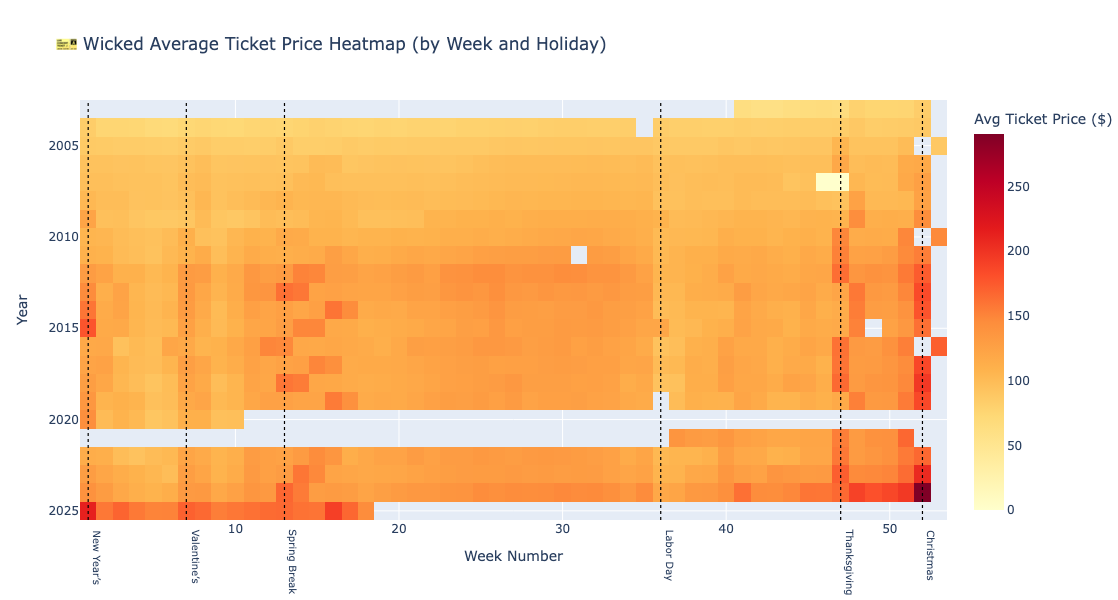

In [132]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv("Datasets/Cleaned_Wicked_Historical_Data.csv")
df = df.dropna(subset=["Week Ending", "Avg Ticket"])
df["Week Ending"] = pd.to_datetime(df["Week Ending"])
df["Year"] = df["Week Ending"].dt.year
df["Week"] = df["Week Ending"].dt.isocalendar().week

heatmap_data = df.pivot_table(values="Avg Ticket", index="Year", columns="Week", aggfunc="mean")

fig = px.imshow(
    heatmap_data,
    labels=dict(x="Week Number", y="Year", color="Avg Ticket Price ($)"),
    color_continuous_scale="YlOrRd",
    aspect="auto",
    title="🎫 Wicked Average Ticket Price Heatmap (by Week and Holiday)"
)

fig.update_layout(yaxis=dict(autorange="reversed"), height=600)

holiday_weeks = {
    "New Year’s": 1,
    "Valentine’s": 7,
    "Spring Break": 13,
    "Labor Day": 36,
    "Thanksgiving": 47,
    "Christmas": 52
}

for label, week in holiday_weeks.items():
    fig.add_vline(
        x=week, line_width=1.2, line_dash="dot", line_color="black",
        annotation=dict(
            text=label,
            showarrow=False,
            font=dict(size=10),
            yanchor="top",
            y=0,
            yshift=-10,
            textangle=90
        )
    )

fig.show()


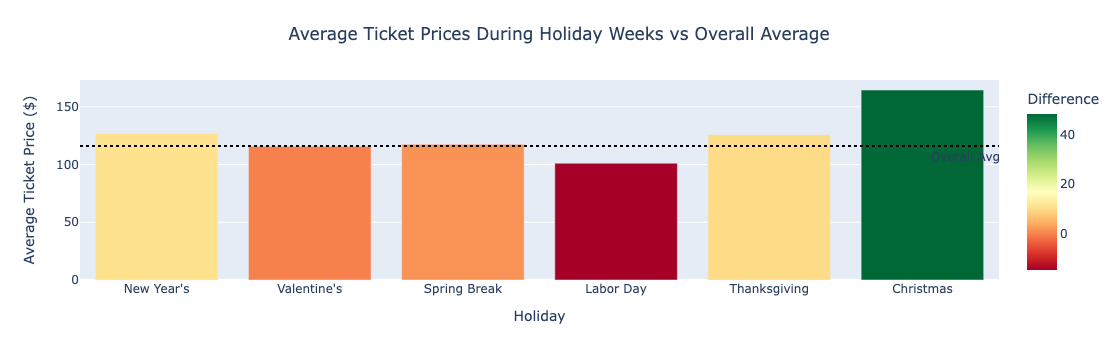

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

df = pd.read_csv("Datasets/Cleaned_Wicked_Historical_Data.csv")
df = df.dropna(subset=["Week Ending", "Avg Ticket"])
df["Week Ending"] = pd.to_datetime(df["Week Ending"])
df["Week Number"] = df["Week Ending"].dt.isocalendar().week

holiday_weeks = {
    "New Year's": 1,
    "Valentine's": 7,
    "Spring Break": 12,
    "Labor Day": 36,
    "Thanksgiving": 47,
    "Christmas": 52
}

holiday_averages = {
    holiday: df[df["Week Number"] == week]["Avg Ticket"].mean()
    for holiday, week in holiday_weeks.items()
}

overall_avg = df["Avg Ticket"].mean()

comparison_df = pd.DataFrame({
    "Holiday": list(holiday_averages.keys()),
    "Holiday Avg Ticket Price": list(holiday_averages.values())
})
comparison_df["Overall Avg Ticket Price"] = overall_avg
comparison_df["Difference"] = comparison_df["Holiday Avg Ticket Price"] - overall_avg

fig = px.bar(
    comparison_df,
    x="Holiday",
    y="Holiday Avg Ticket Price",
    color="Difference",
    color_continuous_scale="RdYlGn",
    title="Average Ticket Prices During Holiday Weeks vs Overall Average",
    labels={"Holiday Avg Ticket Price": "Avg Ticket Price ($)"}
)

fig.add_hline(
    y=overall_avg,
    line_dash="dot",
    line_color="black",
    annotation_text="Overall Avg",
    annotation_position="bottom right"
)

fig.update_layout(
    title_x=0.5,
    margin=dict(t=80),
    yaxis_title="Average Ticket Price ($)",
    xaxis_title="Holiday"
)

fig.show()


## 🎭 Wicked Broadway Pricing Analysis: Holiday Impact & Temporal Trends

This analysis explores how average ticket prices for *Wicked* fluctuate in relation to major holidays and across different weeks of the year, using data spanning from 2003 to 2025.

---

### 📊 1. Holiday vs. Overall Average: Bar Chart Analysis

The chart below compares the **average ticket price** during specific U.S. holidays to the overall average ticket price across all weeks.

#### 🧾 Key Observations:
- 🎄 **Christmas** shows the **most significant spike**, with prices well above the average, likely due to heightened seasonal demand.
- 🎆 **New Year's** and 🦃 **Thanksgiving** also display **noticeable increases**, aligning with school breaks and family travel patterns.
- 💘 **Valentine's**, 🌷 **Spring Break**, and 🇺🇸 **July 4th** see **moderate increases**, suggesting partial demand surges.
- 🧑‍🏭 **Labor Day** is the **only holiday** where average prices **fall below** the overall average.

A **dotted black line** marks the average ticket price across the dataset for visual comparison.

---

### 🌡️ 2. Heatmap of Weekly Ticket Prices: Seasonal Price Behavior

The heatmap below visualizes average ticket prices by **week number (x-axis)** and **year (y-axis)**. Vertical dashed lines represent key holidays, allowing us to observe seasonal pricing trends across time.

#### 📌 Annotated Holidays:
- **Week 1** – New Year's
- **Week 7** – Valentine's Day
- **Week 12** – Spring Break
- **Week 36** – Labor Day
- **Week 47** – Thanksgiving
- **Week 51–52** – Christmas

#### 🔍 Key Patterns:
- Pricing **consistently surges** near **weeks 51–52 (Christmas)** and **week 1 (New Year)** across most years.
- Spring Break and Thanksgiving show **moderate bright streaks**, indicating small but recurring surges.
- A clear **drop in prices** is visible around **Labor Day**, possibly to attract off-peak audiences.
- COVID-19 disruptions (2020–2021) are reflected as **missing or muted data**, with recovery evident in 2022 onward.
- In **2025**, early weeks show a pricing ramp-up, potentially linked to promotional or event tie-ins like the *Wicked* movie release.

---

### 🧠 Summary

The data reveals that *Wicked* strategically adjusts ticket pricing around **high-demand holiday weeks**, with **Christmas** being the most profitable period. This pricing behavior supports data-driven planning for promotions, budgeting, and forecasting future sales trends.

---

### ✅ Conclusion

This analysis of *Wicked’s* Broadway performance data reveals the powerful relationship between cultural events, media influence, and audience behavior over time. By combining interactive time series plots, capacity tracking, and ticket pricing patterns, we observed:

- **Pre-COVID stability** with high capacity and moderate revenue growth.
- A dramatic **pandemic-induced shutdown**, followed by a cautious recovery through 2022.
- A transformative boost following the **release of the Wicked movie** in late 2024, leading to an unprecedented streak of 100% capacity weeks and record-breaking revenues.

Additionally, holiday-driven surges were validated through heatmaps and average comparisons, supporting the notion that seasonal demand plays a critical role in pricing strategy.

Ultimately, *Wicked’s* trajectory illustrates not just resilience in the face of disruption, but a **thriving resurgence enabled by cross-media exposure and renewed cultural relevance**. This makes it a compelling case study in the interplay between live theater and the broader entertainment ecosystem.
